In [1]:
from scipy.stats import norm, uniform
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.insert(0, 'python/')
from python.utils import *
from python.protocol import Protocol

In [2]:
X, y = make_data(N_samples=1000, seed=42)

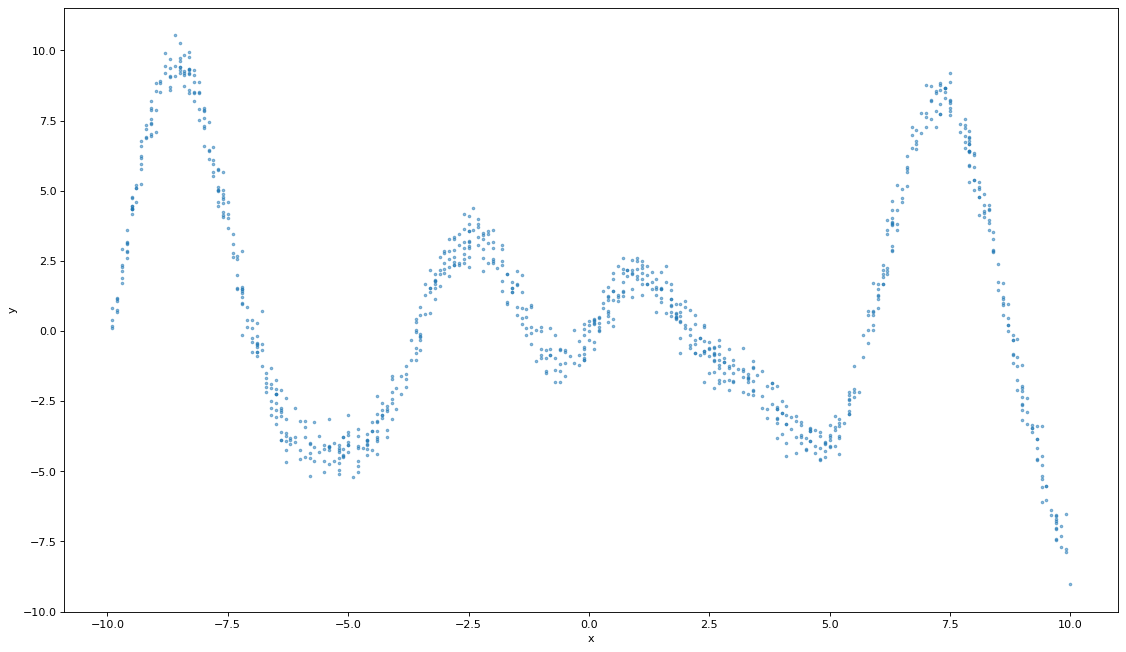

In [3]:
plot_data(X, y)
plt.show()

## *step (i)*

In [4]:
n_LS = 10
N_samples = 10000

X, y = make_data(N_samples=N_samples*n_LS)

## *step (i) -> (vi)*

In [25]:
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor

p = Protocol(X, y, n_LS, [Ridge(alpha=1.0), KNeighborsRegressor(n_neighbors=10)])

In [26]:
noise = p.get_noise()

In [27]:
var, bias_2 = p.get_variance_bias()

In [28]:
error = p.get_expected_error()

# Plot of the expected error, variance, squared bias and noise given a model

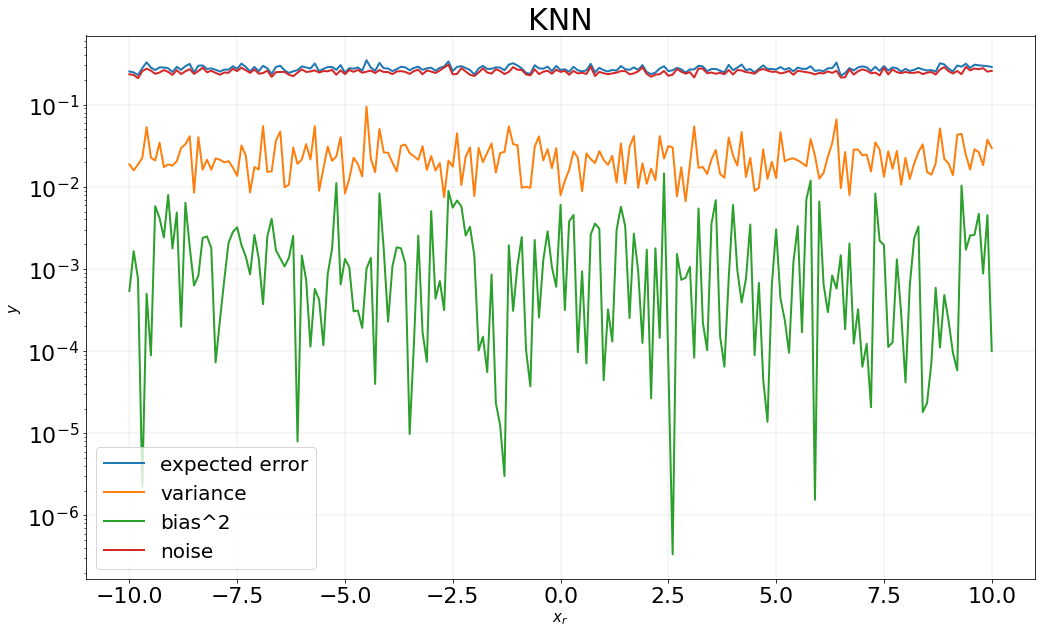

In [30]:
model = 1 # [0, 1]
model_name = ["Ridge", "KNN"]
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(17, 10))
plt.plot(p.get_unique(), error[model], lw=2)
plt.plot(p.get_unique(), var[model], lw=2)
plt.plot(p.get_unique(), bias_2[model],lw=2)
plt.plot(p.get_unique(), noise, lw=2)
plt.legend(["expected error", "variance", "bias^2", "noise"], fontsize=20)
plt.xlabel('$x_r$', fontsize=15)
plt.ylabel('$y$', fontsize=15)
plt.title(model_name[model], fontsize=30)
plt.grid(True, linewidth=.2)
plt.yscale("log")


# Plot of a possible outcome for a certain ridge regression model fed with 10000 samples

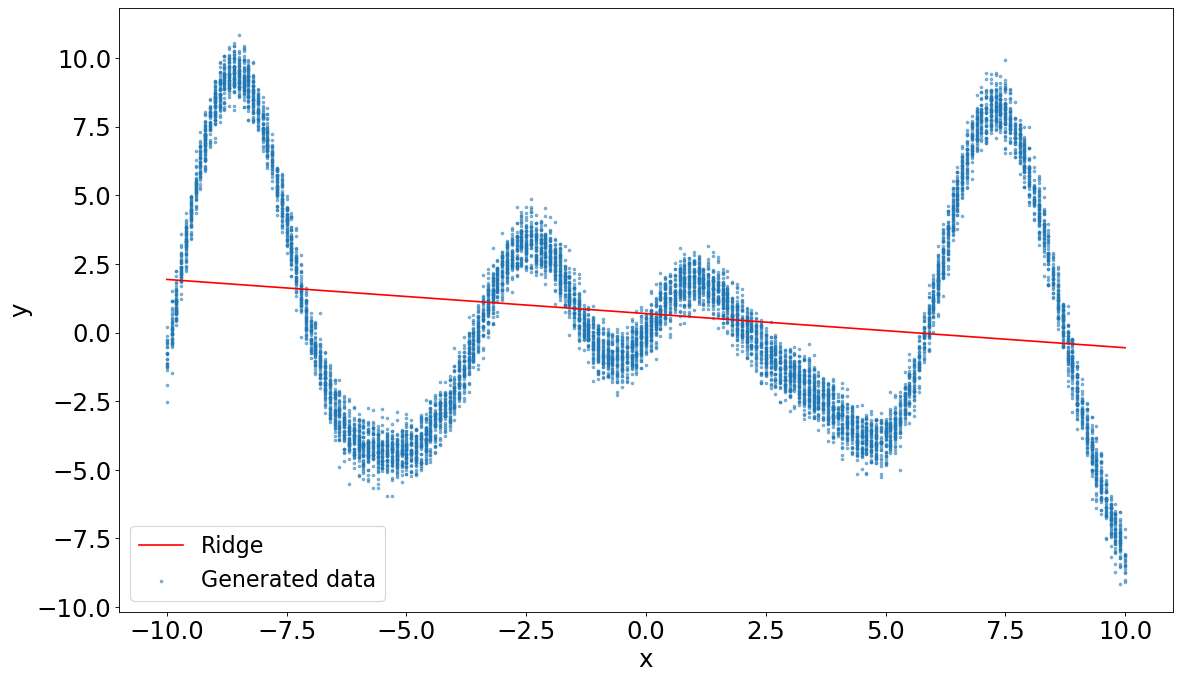

In [11]:
model = Ridge(alpha=1.0)
model.fit(X[:10000].reshape(-1, 1), y[:10000].reshape(-1, 1))
X_unique = p.get_unique()
y_pred = model.predict(X_unique.reshape(-1, 1))

plot_data(X[:10000], y[:10000])
plt.plot(X_unique, y_pred, "r",)
plt.legend(["Ridge", "Generated data"], fontsize=20)
plt.show()

# Plot of a possible outcome of 100 ridge regression model fed with 1000 samples each

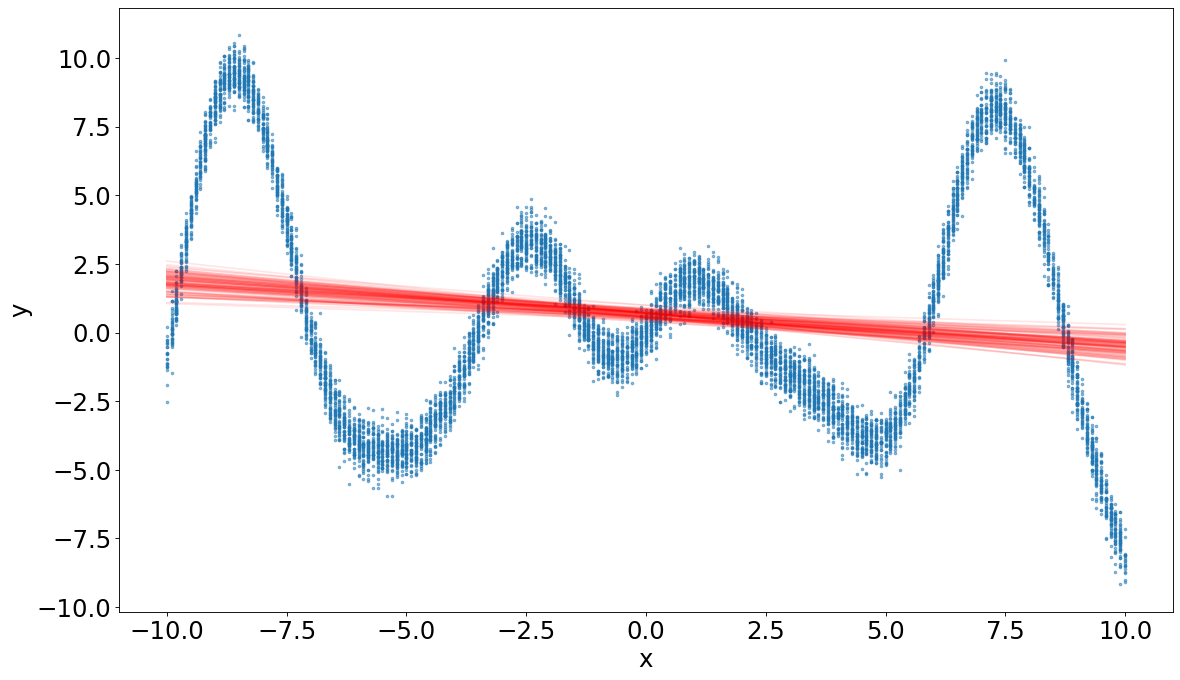

In [18]:
plot_data(X[:10000], y[:10000])

for x_i, y_i in zip(np.split(X, 100), np.split(y, 100)):
    model = Ridge(alpha=1.0)
    model.fit(x_i.reshape(-1, 1), y_i.reshape(-1, 1))
    X_unique = p.get_unique()
    y_pred = model.predict(X_unique.reshape(-1, 1))
    plt.plot(X_unique, y_pred, 'r', alpha=0.1)